Dataset Preview:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


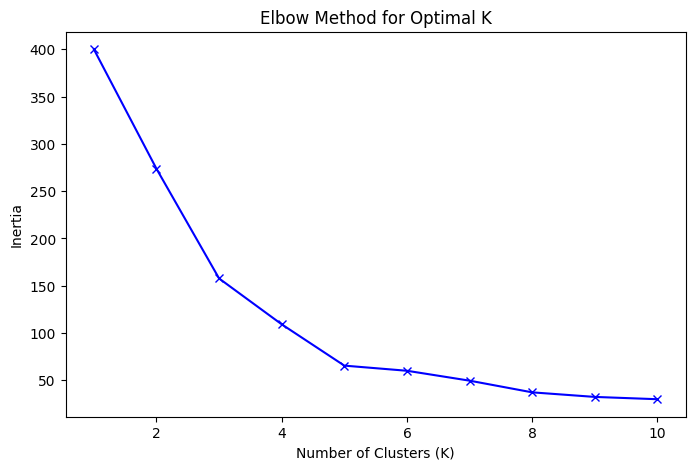


Cluster Centers (Scaled):
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


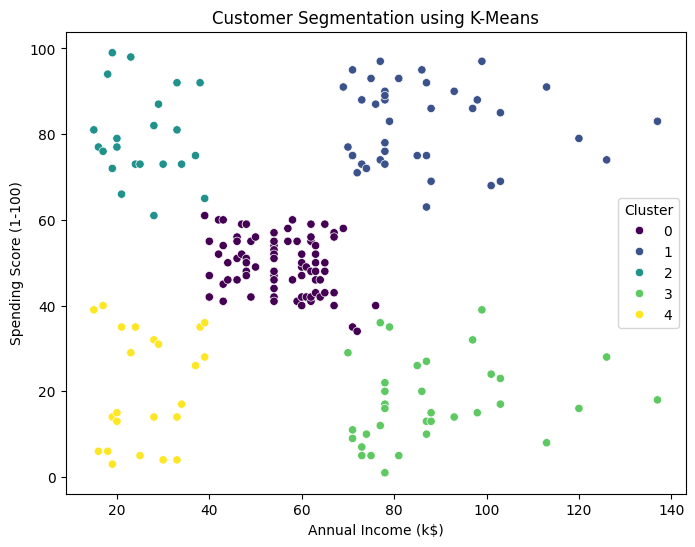

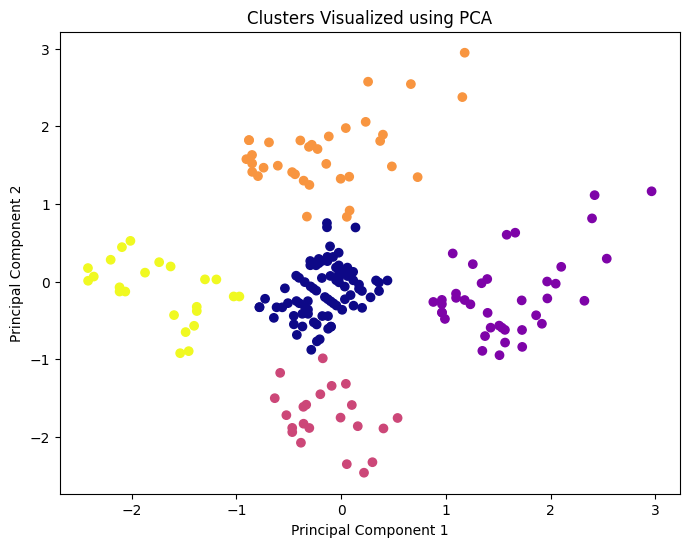


Cluster Summary (Average values):
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [1]:
# -------------------------------
# Customer Segmentation using Clustering
# -------------------------------

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# -------------------------------
# Step 1: Load the dataset
# -------------------------------
# You can use the Mall Customers dataset (download from Kaggle or UCI)
df = pd.read_csv("Mall_Customers.csv")

# Display first few rows
print("Dataset Preview:")
print(df.head())

# -------------------------------
# Step 2: Data Preprocessing
# -------------------------------
# Select useful features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Step 3: Finding the Optimal Number of Clusters (Elbow Method)
# -------------------------------
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# -------------------------------
# Step 4: Apply K-Means Clustering
# -------------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View cluster centers (after scaling)
print("\nCluster Centers (Scaled):")
print(kmeans.cluster_centers_)

# -------------------------------
# Step 5: Visualize the Clusters
# -------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    data=df, 
    palette='viridis'
)
plt.title('Customer Segmentation using K-Means')
plt.show()

# -------------------------------
# Step 6: Dimensionality Reduction using PCA
# -------------------------------
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_components[:,0], pca_components[:,1], c=df['Cluster'], cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualized using PCA')
plt.show()

# -------------------------------
# Step 7: Analyze Cluster Characteristics
# -------------------------------
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Summary (Average values):")
print(cluster_summary)
